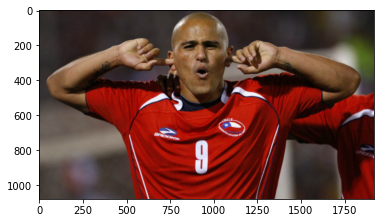

In [177]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
#Tarea 3 - Benjamin Parraguez 

#La pregunta 1b y 1c van ejecutada una tras otra en el codigo, debido a simplificar y reciclar variables.

#Pregunta 1

imgT = cv2.imread('HumbertoSuazo.png') 
imgColor = cv2.cvtColor(imgT, cv2.COLOR_BGR2RGB) #Imagen de 1920 x 1080

plt.imshow(imgColor)
plt.show()

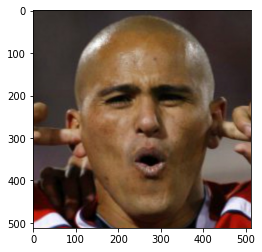

In [178]:
ImgRecortada = imgColor[0:512,660:1172] #Imagen recortada de 512 x 512

plt.imshow(ImgRecortada)
plt.show()

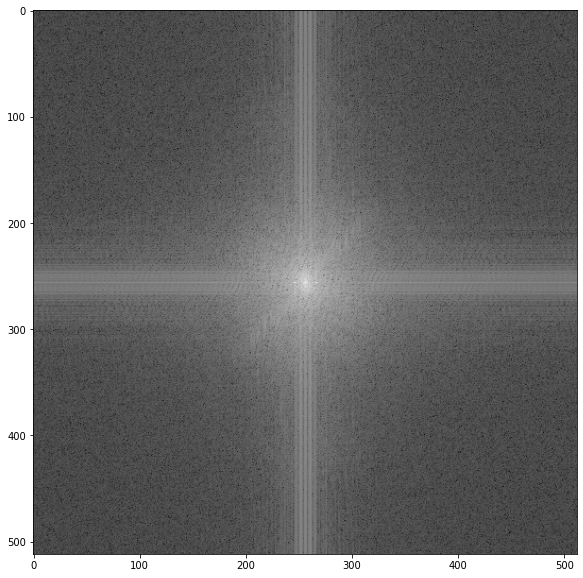

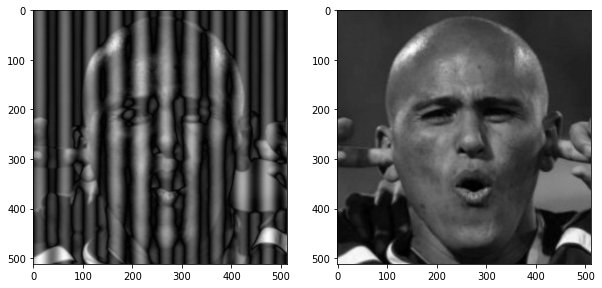

In [179]:
#2. Genere una nueva imagen con un ruido frecuencial de 10Hz, 30Hz y 50Hz en forma vertical (usted
#define la amplitud de la señal).

gray = cv2.cvtColor(ImgRecortada,cv2.COLOR_BGR2GRAY)
gray = cv2.normalize(gray.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
#vamos a crear ruido 10hz
V = np.linspace(0,1,num=512)
Y = 0.4*np.sin(2*np.pi*10*V)
M = np.matlib.repmat(Y,512,1)
noise_img= np.add(M, gray) #generamos el ruido de forma vertical en nuestra imagen.

#vamos aplicar fourier y visualizar el espectro
F = np.fft.fft2(noise_img)
fshift = np.fft.fftshift(F)
spectrum = 0.4*np.log(np.abs(fshift))

plt.figure(figsize=(10, 10))
plt.imshow(spectrum, cmap='gray')
plt.show()

#Graficamos
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,10)
ax[0].imshow(abs(noise_img), cmap='gray')
ax[1].imshow(abs(gray), cmap='gray')
plt.show()


C:\Users\benja\AppData\Local\Temp/ipykernel_17100/444944728.py:5: RuntimeWarning: divide by zero encountered in log
  spectrum = 0.4*np.log(np.abs(fshift))


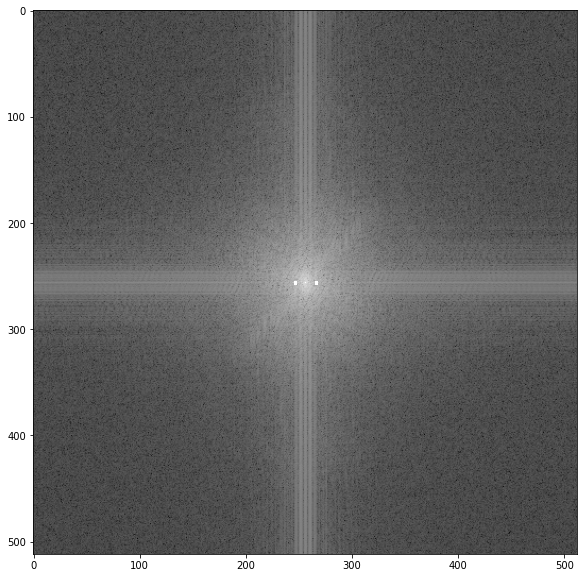

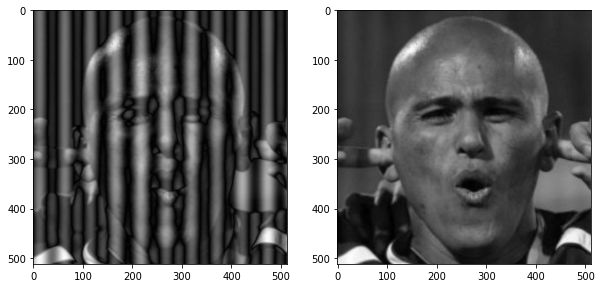

In [180]:
#Parte 2 Arreglando el Ruido de 10 hz
#para arreglar la imagen, es necesario tapar los puntos blancos que estan en el medio (no en el centro)
#utilizando fshift damos las coordenadas para tapar aquellos puntos
fshift[256:258,246:248]=0.0
fshift[256:258,266:268]=0.0

spectrum = 0.4*np.log(np.abs(fshift))

plt.figure(figsize=(10, 10))
plt.imshow(spectrum, cmap="gray")
plt.show()

S= np.fft.ifft2(np.fft.fftshift(fshift))
S= S.real

fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,10)
ax[0].imshow(abs(noise_img), cmap='gray')
ax[1].imshow(abs(S), cmap='gray')
plt.imshow(S, cmap="gray")
plt.show()

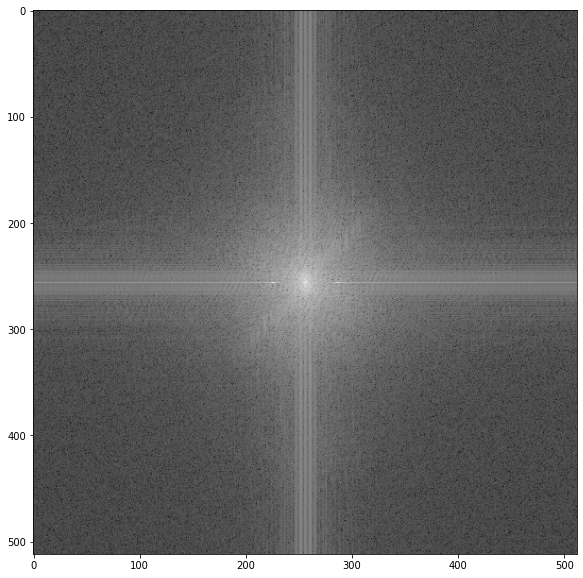

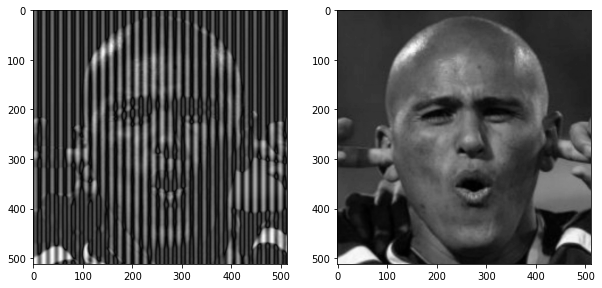

In [191]:
#Ruido a 30Hz, aplicamos lo mismo para este caso.

V = np.linspace(0,1,num=512)
Y = 0.4*np.sin(2*np.pi*30*V)
M = np.matlib.repmat(Y,512,1)
noise_img= np.add(M, gray)

#vamos aplicar fourier
F = np.fft.fft2(noise_img)
fshift = np.fft.fftshift(F)
spectrum = 0.4*np.log(np.abs(fshift))
plt.figure(figsize=(10, 10))
plt.imshow(spectrum, cmap='gray')
plt.show()

fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,10)
ax[0].imshow(abs(noise_img), cmap='gray')
ax[1].imshow(abs(gray), cmap='gray')
plt.show()

C:\Users\benja\AppData\Local\Temp/ipykernel_17100/2494271456.py:4: RuntimeWarning: divide by zero encountered in log
  spectrum = 0.4*np.log(np.abs(fshift))


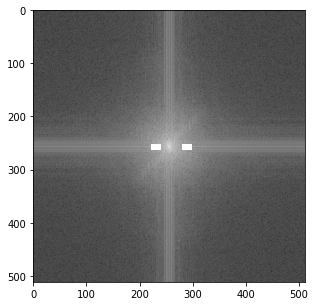

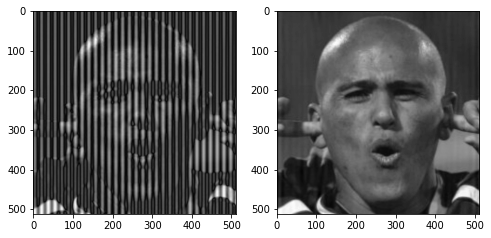

In [195]:
#Arreglamos el ruido de 30hz

fshift[254:262,224:239]=0.0 #modificamos los valores para tapar los puntos blanco del espectro (no el del
fshift[254:262,282:297]=0.0 #centro)

spectrum = 0.4*np.log(np.abs(fshift))

plt.figure(figsize=(5, 5))
plt.imshow(spectrum, cmap="gray")
plt.show()

S= np.fft.ifft2(np.fft.fftshift(fshift))
S= S.real

fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,8)
ax[0].imshow(abs(noise_img), cmap='gray')
ax[1].imshow(abs(S), cmap='gray')
plt.imshow(S, cmap="gray")
plt.show()

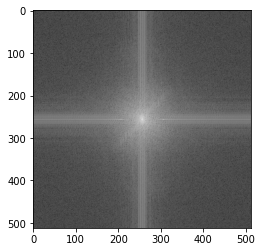

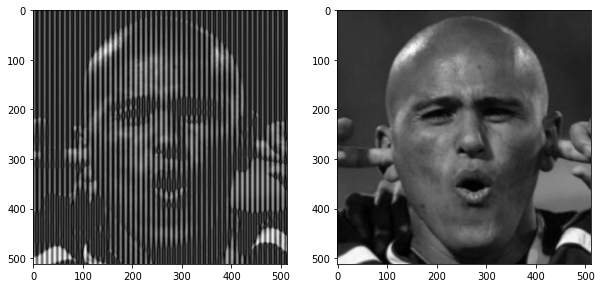

In [196]:
#Ruido a 50 hz

V = np.linspace(0,1,num=512)
Y = 0.4*np.sin(2*np.pi*50*V)
M = np.matlib.repmat(Y,512,1)
noise_img= np.add(M, gray)

#vamos aplicar fourier
F = np.fft.fft2(noise_img)
fshift = np.fft.fftshift(F)
spectrum = 0.4*np.log(np.abs(fshift))
plt.imshow(spectrum, cmap='gray')
plt.show()

fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,10)
ax[0].imshow(abs(noise_img), cmap='gray')
ax[1].imshow(abs(gray), cmap='gray')
plt.show()
plt.show()

C:\Users\benja\AppData\Local\Temp/ipykernel_17100/707436973.py:4: RuntimeWarning: divide by zero encountered in log
  spectrum = 0.4*np.log(np.abs(fshift))


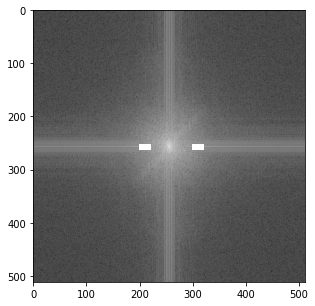

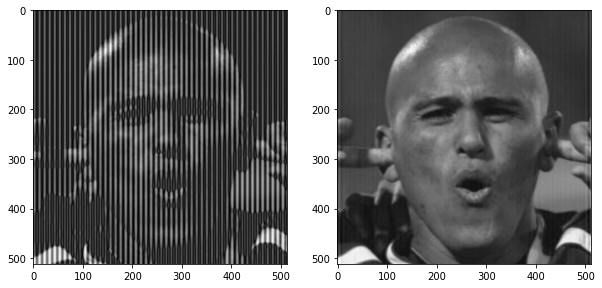

In [197]:
#Arreglamos el ruido de 50hz

fshift[254:262,200:220]=0.0 #modificamos los valores para tapar los puntos blanco del espectro (no el del
fshift[254:262,300:320]=0.0 #centro)

spectrum = 0.4*np.log(np.abs(fshift))

plt.figure(figsize=(5, 5))
plt.imshow(spectrum, cmap="gray")
plt.show()

S= np.fft.ifft2(np.fft.fftshift(fshift))
S= S.real

fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,10)
ax[0].imshow(abs(noise_img), cmap='gray')
ax[1].imshow(abs(S), cmap='gray')
plt.imshow(S, cmap="gray")
plt.show()

In [7]:
#Genere una imagen con ruido empleando el siguiente código (no lo modifique). Luego desarrolle un
#filtro en la frecuencia para reducir dicho ruido. Usted debe definir el filtro más apropiado.

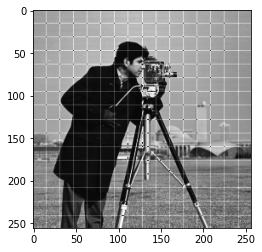

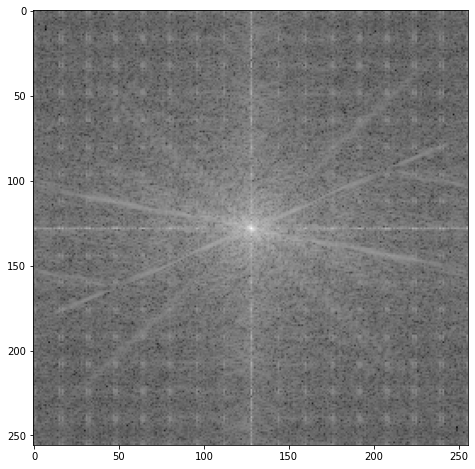

In [187]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
img = cv2.imread('cameraman.png',cv2.IMREAD_GRAYSCALE)
m = img.shape[0]
delta = 15
V = np.fix(np.linspace(delta,m-delta,delta)).astype('uint8')
img[V,:] = img[V,:]+50
img[:,V] = img[:,V]+50
plt.imshow(img, cmap='gray')
plt.show()

#revisamos el espectro
F = np.fft.fft2(img)
fshift = np.fft.fftshift(F)
spectrum = 0.4*np.log(np.abs(fshift))
plt.figure(figsize=(8, 8))
plt.imshow(spectrum, cmap='gray')
plt.show()
# 



C:\Users\benja\AppData\Local\Temp/ipykernel_17100/3699708444.py:19: RuntimeWarning: divide by zero encountered in log
  spectrum = 0.4*np.log(np.abs(fshift))


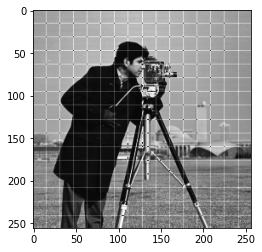

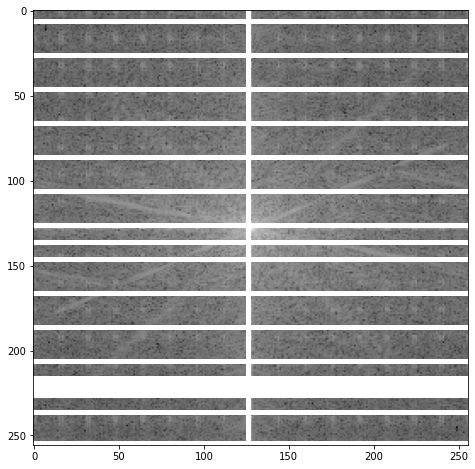

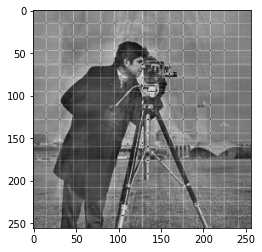

In [188]:
#Forma 1, filtro puntual
fshift[0:256,126:128]=0.0 #
fshift[6:8,0:256]=0.0 #
fshift[26:28,0:256]=0.0 #centro)
fshift[46:48,0:256]=0.0 #centro)
fshift[66:68,0:256]=0.0 #centro)
fshift[86:88,0:256]=0.0 #centro)
fshift[106:108,0:256]=0.0 #centro)
fshift[126:128,0:256]=0.0 #centro)
fshift[136:138,0:256]=0.0 #centro)
fshift[146:148,0:256]=0.0 #centro)
fshift[166:168,0:256]=0.0 #centro)
fshift[186:188,0:256]=0.0 #centro)
fshift[206:208,0:256]=0.0 #centro)
fshift[216:228,0:256]=0.0 #centro)
fshift[226:228,0:256]=0.0 #centro)
fshift[236:238,0:256]=0.0 #centro)
fshift[254:256,0:256]=0.0 #centro)

spectrum = 0.4*np.log(np.abs(fshift))


F= np.fft.fft2(img)
FS = np.fft.fftshift(F)


S= np.fft.ifft2(np.fft.fftshift(fshift))
S= S.real


plt.figure()
plt.imshow(img, cmap="gray")
plt.show()

plt.figure(figsize=(8, 8))
plt.imshow(spectrum, cmap='gray')
plt.show()

plt.imshow(S, cmap='gray')
plt.show()


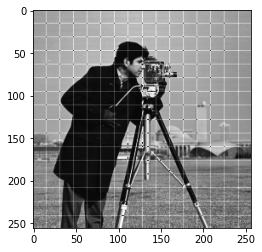

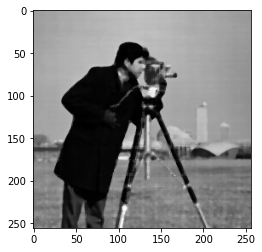

In [189]:
#Forma 2, utilizando filtro mediana.

F = np.fft.fft2(img)
fshift = np.fft.fftshift(F)
spectrum = 0.4*np.log(np.abs(fshift))


def filtro_mediana(A):
    S= np.median(A.flatten())
    return S

#aplicamos el filtro mediana
filtro= ndi.generic_filter(img,filtro_mediana, [4,4])
                                                

plt.figure()
plt.imshow(img, cmap="gray")
plt.show()

plt.imshow(filtro, cmap='gray')
plt.show()

In [ ]:
#Podemos notar que el filtro de la mediana es el que mejor funciona para eliminar el ruido.